40


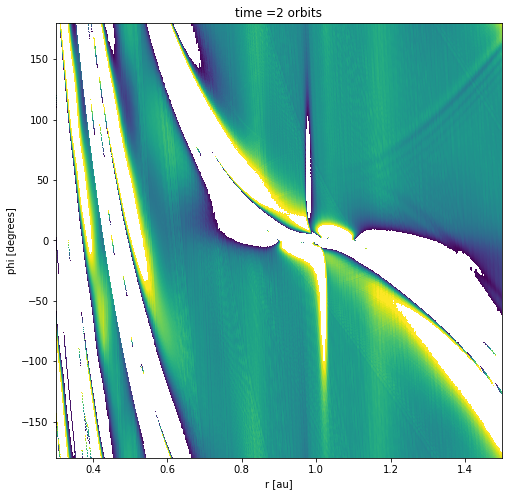

In [1]:
import readfargo as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

path = './bae2017_01mth/'
nstart = 2
itime = nstart
r0 = 1.0
fargo    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path)

phi = np.loadtxt(path +'domain_x.dat')
rad  = np.loadtxt(path +'domain_y.dat')[3:-3]

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                  \     $

rad   = 0.5*(rad[:-1] + rad[1:])

phi2d, rad2d = np.meshgrid(phi, rad) #explain meshgrid?                                                                                                                 \     $


X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

nx = len(phi)
ny = len(rad)

nf = nstart
print(nf*20)
rho_init   = pl.fromfile(path +'gasdens0.dat').reshape(ny,nx)
rho   = pl.fromfile(path+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init   = pl.fromfile(path + 'gasvx0.dat').reshape(ny,nx)
vphi   = pl.fromfile(path+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad     = pl.fromfile(path+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init = pl.fromfile(path+'gasvy0.dat').reshape(ny,nx)
omegap = np.loadtxt(path+'planet0.dat')[itime][-1]
vphi += omegap*rad2d
omegapinit = np.loadtxt(path+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad2d
vmin = -.01
vmax = .01
levels = np.linspace(vmin,vmax,256)


dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv = ((rad2d*vphi)[1:,:]-(rad2d*vphi)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
#pv = pv[:,:-1]
pv -= ((vrad[1:]-vrad[:-1])/dphi)[:,:]
pv /= rad2d[:-1,:]
pv /= rho[:-1,:]

pv_init = ((rad2d*vphi_init)[1:,:]-(rad2d*vphi_init)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
#pv_init = pv_init[:,:-1]
pv_init -= ((vrad_init[1:]-vrad_init[:-1])/dphi)[:,:]
pv_init /= rad2d[:-1,:]
pv_init /= rho_init[:-1,:]

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(fargo.r[1:], fargo.phi[:]*180/np.pi, ((pv-pv_init)/pv_init).T, levels=levels)
ax.set_xlim(0.3,1.5)
ax.set_xlabel('r [au]')
ax.set_ylabel('phi [degrees]')
ax.set_title(f'time ='+ str(nf) +' orbits')
plt.savefig('PV_image100.png',dpi = 300)


(2047, 5580)
(2047, 5580)
[[-5.73864905e-06 -5.76505385e-06 -5.79166013e-06 ... -5.66062123e-06
  -5.68643590e-06 -5.71244510e-06]
 [ 1.01306350e-05  1.00933587e-05  1.00558772e-05 ...  1.02411910e-05
   1.02045587e-05  1.01677035e-05]
 [ 2.55419094e-05  2.54865758e-05  2.54309872e-05 ...  2.57063845e-05
   2.56518102e-05  2.55969895e-05]
 ...
 [-1.49150806e-04 -1.49022117e-04 -1.48893786e-04 ... -1.49538758e-04
  -1.49409182e-04 -1.49279839e-04]
 [-1.36234580e-04 -1.36125164e-04 -1.36015250e-04 ... -1.36560593e-04
  -1.36452176e-04 -1.36343552e-04]
 [-1.23714560e-04 -1.23595005e-04 -1.23473446e-04 ... -1.24061521e-04
  -1.23947754e-04 -1.23832128e-04]]


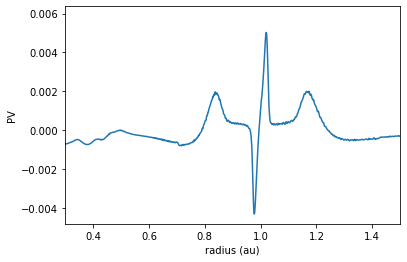

In [3]:
pv2d = pv.mean(axis=1)
pv_init2d = pv_init.mean(axis=1)

plt.plot(fargo.r[1:],(pv2d-pv_init2d)/pv_init2d)#.mean(axis=1))
plt.xlabel('radius (au)')
plt.ylabel('PV')
plt.xlim(0.3, 1.5)

#plt.plot(fargo.r[:],pv_init)
print(((rad2d*vphi)[1:,:]-(rad2d*vphi)[:-1,:]).shape)#
print((rad2d[1:]-rad2d[:-1]).shape )
print(((vrad[1:]-vrad[:-1])/dphi)[:,:])